In [ ]:
try:
    import jax
except:
    %pip install jax jaxlib
    import jax
import jax.numpy as jnp

try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns

try:
    import tinygp
except ModuleNotFoundError:
    %pip install -qqq tinygp
    import tinygp

kernels = tinygp.kernels
from tinygp import GaussianProcess

print("finished installation")

     |████████████████████████████████| 42 kB 388 kB/s 


In [ ]:
import os

# If you have latex installed, then uncomment this:
# os.environ["LATEXIFY"]="1"
# If you don't have latex, you will get this error
# "Failed to process string with tex because latex could not be found"
# To unset the variable, use this:
# del os.environ['LATEXIFY']

LATEXIFY = "LATEXIFY" in os.environ

if LATEXIFY:
    print("latexifying")
    import sys

    sys.path.append("scripts")
    #!wget https://raw.githubusercontent.com/probml/pyprobml/master/scripts/probml_utils.py

    from probml_utils import latexify, savefig

    latexify(width_scale_factor=4, height_scale_factor=1.5 / 2)

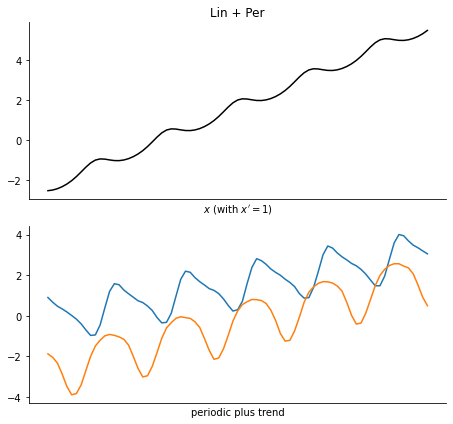

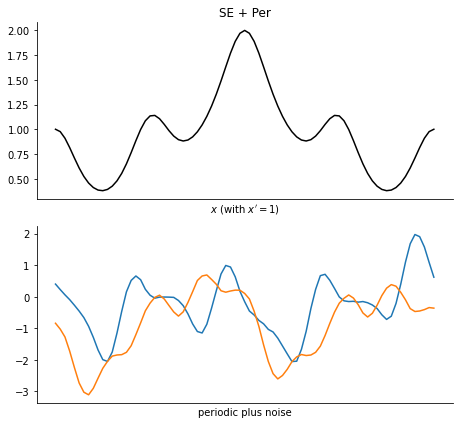

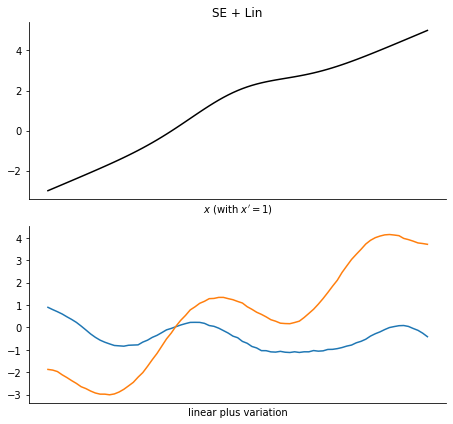

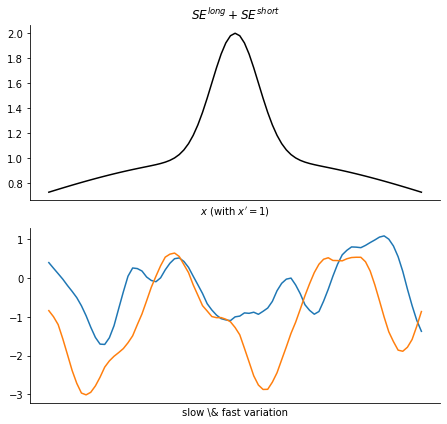

In [ ]:
def plot_sample(data, save_name):
    print("creating ", save_name)
    if LATEXIFY:
        fig, ax = plt.subplots(2, 1)
    else:
        fig, ax = plt.subplots(2, 1, figsize=(6.4, 6))

    # Plot kernel
    kernel = data["kernel1"] + data["kernel2"]
    x2 = jnp.array([1.0]).reshape(-1, 1)
    kernel_values = kernel(x, x2)
    ax[0].plot(x.ravel(), kernel_values.ravel(), color="k")

    # Plot samples
    gp = GaussianProcess(kernel, x)
    samples = gp.sample(key, (2,))
    for sample in samples:
        ax[1].plot(x, sample)
    ax[0].set_title(data["title"])
    ax[1].set_xlabel(data["xlabel"])
    for axes in ax:
        axes.set_xticks([])
    ax[0].set_xlabel("$x$ (with $x'=1$)")
    plt.tight_layout()
    sns.despine()
    if LATEXIFY and len(save_name) > 0:
        print("saving to ", save_name)
        savefig(save_name)
    return fig, ax


x = jnp.arange(-3.0, 5.1, 0.1).reshape(-1, 1)
N = len(x)

key = jax.random.PRNGKey(4)

fig, ax = plot_sample(
    {
        "kernel1": kernels.Polynomial(order=1),
        "kernel2": kernels.ExpSineSquared(scale=1.5, gamma=1.0),
        "title": "Lin + Per",
        "xlabel": "periodic plus trend",
    },
    save_name="kernel_sum_lin_per_latexified.pdf",
)

fig, ax = plot_sample(
    {
        "kernel1": kernels.ExpSquared(scale=1.0),
        "kernel2": kernels.ExpSineSquared(scale=2.0, gamma=1.0),
        "title": "SE + Per",
        "xlabel": "periodic plus noise",
    },
    save_name="kernel_sum_se_per_latexified.pdf",
)

fig, ax = plot_sample(
    {
        "kernel1": kernels.ExpSquared(scale=1.0),
        "kernel2": kernels.Polynomial(order=1),
        "title": "SE + Lin",
        "xlabel": "linear plus variation",
    },
    save_name="kernel_sum_lin_se_latexified.pdf",
)

fig, ax = plot_sample(
    {
        "kernel1": kernels.ExpSquared(scale=5.0),
        "kernel2": kernels.ExpSquared(scale=0.5),
        "title": "$SE^{long} + SE^{short}$",
        "xlabel": "slow \& fast variation",
    },
    save_name="kernel_sum_se_se_latexified.pdf",
)